In [75]:
import numpy as np
import pandas as pd
from math import exp

In [76]:
# Define the incumbents' attributes
incumbent_attributes = [('$30', '3 hrs', '20 oz', 'Clean Easy', 'Leak resistant', 'Brand A'),
                        ('$10', '1 hrs', '20 oz', 'Clean Fair', 'Spill resistant', 'Brand B'),
                        ('$30', '1 hrs', '20 oz', 'Clean Easy', 'Leak resistant', 'Brand C')]

# Define the scaling constant
c = 0.0139

In [77]:
# Define the attribute levels
price_levels = ['$30', '$10', '$5']
time_insulated_levels = ['0.5 hrs', '1 hrs', '3 hrs']
capacity_levels = ['12 oz', '20 oz', '32 oz']
cleanability_levels = ['Difficult (7 min)', 'Fair (5 min)', 'Easy (2 min)']
containment_levels = ['Slosh resistant', 'Spill resistant', 'Leak resistant']
brand_levels = ['Brand A', 'Brand B', 'Brand C']

In [78]:
# Define the cost structure
time_insulated_costs = {'0.5 hrs': 0.5, '1 hrs': 1, '3 hrs': 3}
capacity_costs = {'12 oz': 1.00, '20 oz': 2.6, '32 oz': 2.8}
cleanability_costs = {'Difficult (7 min)': 1, 'Fair (5 min)': 2.2, 'Easy (2 min)': 3.0}
containment_costs = {'Slosh resistant': 0.5, 'Spill resistant': 0.8, 'Leak resistant': 1}

# Define the part-worth utility matrix
part_worth_utilities = np.zeros((5, 3))

In [79]:
# Create a table header
table_header = ["Price", "Time Insulated", "Capacity", "Cleanability", "Containment", "Brand", "Share", "Cost", "Margin", "Expected Profit per Person"]

In [80]:
# Print the table header
print("\t".join(table_header))

Price	Time Insulated	Capacity	Cleanability	Containment	Brand	Share	Cost	Margin	Expected Profit per Person


In [81]:
# Compute the part-worth utility matrix and other metrics for each candidate
for i, level in enumerate(price_levels):
    for j, level2 in enumerate(time_insulated_levels):
        for k, level3 in enumerate(capacity_levels):
            for l, level4 in enumerate(cleanability_levels):
                for m, level5 in enumerate(containment_levels):
                    for n in range(3):
                        # Compute the attribute vector for the candidate product
                        candidate_attributes = [level, level2, level3, level4, level5, brand_levels[n]]
                        
                        # Compute the part-worth utility of each attribute level using the logit model
                        utilities = []
                        for a in range(5):
                            part_worth = 0
                            for incumbent in incumbent_attributes:
                                # Compute the difference in utility between the candidate and incumbent products
                                diff = 0
                                for b in range(5):
                                    if a == b:
                                        diff += c * (incumbent[b] == candidate_attributes[b])
                                    else:
                                        diff -= c * (incumbent[b] == candidate_attributes[b])
                                part_worth += np.exp(diff)
                            utilities.append(part_worth)

                        # Compute the probabilities of choice for each candidate using the logit model
                        probabilities = [u / sum(utilities) for u in utilities]

                        # Compute the cost of producing each candidate
                        cost = time_insulated_costs[level2] + capacity_costs[level3] + cleanability_costs[level4] + containment_costs[level5]

                        # Compute the share of each candidate
                        share = 0
                        for a, p in enumerate(probabilities):
                            share += p * (1 - sum([probabilities[b] for b in range(3) if b != a]))

                        # Compute the margin of each candidate
                        margin = float(level[1:]) - cost

                        # Compute the expected profit per person for each candidate
                        expected_profit_per_person = share * margin

                        # Print the results for each candidate
                        row_values = [level, level2, level3, level4, level5, brand_levels[n], f"{share:.4f}", f"{cost:.2f}", f"{margin:.2f}", f"{expected_profit_per_person:.2f}"]
                        print("\t".join(row_values))

$30	0.5 hrs	12 oz	Difficult (7 min)	Slosh resistant	Brand A	0.5191	3.00	27.00	14.02
$30	0.5 hrs	12 oz	Difficult (7 min)	Slosh resistant	Brand B	0.5191	3.00	27.00	14.02
$30	0.5 hrs	12 oz	Difficult (7 min)	Slosh resistant	Brand C	0.5191	3.00	27.00	14.02
$30	0.5 hrs	12 oz	Difficult (7 min)	Spill resistant	Brand A	0.5198	3.30	26.70	13.88
$30	0.5 hrs	12 oz	Difficult (7 min)	Spill resistant	Brand B	0.5198	3.30	26.70	13.88
$30	0.5 hrs	12 oz	Difficult (7 min)	Spill resistant	Brand C	0.5198	3.30	26.70	13.88
$30	0.5 hrs	12 oz	Difficult (7 min)	Leak resistant	Brand A	0.5205	3.50	26.50	13.79
$30	0.5 hrs	12 oz	Difficult (7 min)	Leak resistant	Brand B	0.5205	3.50	26.50	13.79
$30	0.5 hrs	12 oz	Difficult (7 min)	Leak resistant	Brand C	0.5205	3.50	26.50	13.79
$30	0.5 hrs	12 oz	Fair (5 min)	Slosh resistant	Brand A	0.5191	4.20	25.80	13.39
$30	0.5 hrs	12 oz	Fair (5 min)	Slosh resistant	Brand B	0.5191	4.20	25.80	13.39
$30	0.5 hrs	12 oz	Fair (5 min)	Slosh resistant	Brand C	0.5191	4.20	25.80	13.39
$30	0.5 hr

In [82]:
# Create a list to store the table data
table_data = []

In [83]:
# Compute the part-worth utility matrix and other metrics for each candidate
for level in price_levels:
    for level2 in time_insulated_levels:
        for level3 in capacity_levels:
            for level4 in cleanability_levels:
                for level5 in containment_levels:
                    # Compute the attribute vector for the candidate product
                    candidate_attributes = [level, level2, level3, level4, level5]
                    
                    # Compute the part-worth utility of each attribute level using the logit model
                    utilities = []
                    for a in range(5):
                        part_worth = 0
                        for incumbent in incumbent_attributes:
                            # Compute the difference in utility between the candidate and incumbent products
                            diff = 0
                            for b in range(5):
                                if a == b:
                                    diff += c * (incumbent[b] == candidate_attributes[b])
                                else:
                                    diff -= c * (incumbent[b] == candidate_attributes[b])
                            part_worth += np.exp(diff)
                        utilities.append(part_worth)

                    # Compute the probabilities of choice for each candidate using the logit model
                    probabilities = [u / sum(utilities) for u in utilities]

                    # Compute the cost of producing each candidate
                    cost = time_insulated_costs[level2] + capacity_costs[level3] + cleanability_costs[level4] + containment_costs[level5]

                    # Compute the share of each candidate
                    share = 0
                    for a, p in enumerate(probabilities):
                        share += p * (1 - sum([probabilities[b] for b in range(3) if b != a]))

                    # Compute the margin of each candidate
                    margin = float(level[1:]) - cost

                    # Compute the expected profit per person for each candidate
                    expected_profit_per_person = share * margin

                    # Append the results for each candidate to the table data
                    row_values = [level, level2, level3, level4, level5, f"{share:.4f}", f"{cost:.2f}", f"{margin:.2f}", f"{expected_profit_per_person:.2f}"]
                    table_data.append(row_values)

In [84]:
# Create a DataFrame from the table data
df = pd.DataFrame(table_data, columns=["Price", "Time Insulated", "Capacity", "Cleanability", "Containment", "Share", "Cost", "Margin", "Expected Profit per Person"])

In [85]:
df['Share'] = pd.to_numeric(df['Share'])
df['Cost'] = pd.to_numeric(df['Cost'])
df['Margin'] = pd.to_numeric(df['Margin'])
df['Expected Profit per Person'] = pd.to_numeric(df['Expected Profit per Person'])

In [86]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 243 entries, 0 to 242
Data columns (total 9 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Price                       243 non-null    object 
 1   Time Insulated              243 non-null    object 
 2   Capacity                    243 non-null    object 
 3   Cleanability                243 non-null    object 
 4   Containment                 243 non-null    object 
 5   Share                       243 non-null    float64
 6   Cost                        243 non-null    float64
 7   Margin                      243 non-null    float64
 8   Expected Profit per Person  243 non-null    float64
dtypes: float64(4), object(5)
memory usage: 17.2+ KB


In [87]:
print(df)

    Price Time Insulated Capacity       Cleanability      Containment   Share  \
0     $30        0.5 hrs    12 oz  Difficult (7 min)  Slosh resistant  0.5191   
1     $30        0.5 hrs    12 oz  Difficult (7 min)  Spill resistant  0.5198   
2     $30        0.5 hrs    12 oz  Difficult (7 min)   Leak resistant  0.5205   
3     $30        0.5 hrs    12 oz       Fair (5 min)  Slosh resistant  0.5191   
4     $30        0.5 hrs    12 oz       Fair (5 min)  Spill resistant  0.5198   
..    ...            ...      ...                ...              ...     ...   
238    $5          3 hrs    32 oz       Fair (5 min)  Spill resistant  0.5202   
239    $5          3 hrs    32 oz       Fair (5 min)   Leak resistant  0.5209   
240    $5          3 hrs    32 oz       Easy (2 min)  Slosh resistant  0.5196   
241    $5          3 hrs    32 oz       Easy (2 min)  Spill resistant  0.5202   
242    $5          3 hrs    32 oz       Easy (2 min)   Leak resistant  0.5209   

     Cost  Margin  Expected

In [88]:
AvgCandidateShare = df['Share'].mean()
AvgCost = df['Cost'].mean()
AvgMargin = df['Margin'].mean()
AvgExpectedProfitPerPerson = df['Expected Profit per Person'].mean()

In [89]:
print(f'Average Candidate Share:',AvgCandidateShare)
print(f'Average Cost:',AvgCost)
print(f'Average Margin:',AvgMargin)
print(f'Average Expected Profit per Person:',AvgExpectedProfitPerPerson)

Average Candidate Share: 0.5193407407407408
Average Cost: 6.466666666666665
Average Margin: 8.533333333333331
Average Expected Profit per Person: 4.428230452674898


In [90]:
# Save the DataFrame to a CSV file
df.to_csv("candidate_data_243_combinations.csv", index=False)

print("CSV file 'candidate_data_243_combinations.csv' created successfully.")

CSV file 'candidate_data_243_combinations.csv' created successfully.


In [91]:
# Define the attribute levels
price_levels = ['$30', '$10', '$5']
time_insulated_levels = ['0.5 hrs', '1 hrs', '3 hrs']
capacity_levels = ['12 oz', '20 oz', '32 oz']
cleanability_levels = ['Difficult (7 min)', 'Clean Fair', 'Clean Easy']
containment_levels = ['Slosh resistant', 'Spill resistant', 'Leak resistant']

In [92]:
# Define our candidate's attributes
candidate_attributes = ['$30', '1 hrs', '20 oz', 'Clean Easy', 'Leak resistant', 'Brand C']

In [93]:
# Define the cost structure
time_insulated_costs = {'0.5 hrs': 0.5, '1 hrs': 1, '3 hrs': 3}
capacity_costs = {'12 oz': 1.00, '20 oz': 2.6, '32 oz': 2.8}
cleanability_costs = {'Difficult (7 min)': 1, 'Clean Fair': 2.2, 'Clean Easy': 3.0}
containment_costs = {'Slosh resistant': 0.5, 'Spill resistant': 0.8, 'Leak resistant': 1}

In [94]:
# Create a list to store the table data
table_data = []

In [95]:
# Compute the cost and margin of our candidate
cost = time_insulated_costs[candidate_attributes[1]] + capacity_costs[candidate_attributes[2]] + cleanability_costs[candidate_attributes[3]] + containment_costs[candidate_attributes[4]]
margin = float(candidate_attributes[0][1:]) - cost

In [96]:
# Create a variable to track the best product
best_product = None
max_expected_profit = float('-inf')

In [97]:
# Compute the part-worth utility matrix and other metrics for each candidate
for level in price_levels:
    for level2 in time_insulated_levels:
        for level3 in capacity_levels:
            for level4 in cleanability_levels:
                for level5 in containment_levels:
                    # Compute the attribute vector for the candidate product
                    candidate_attributes = [level, level2, level3, level4, level5]
                    
                    # Compute the expected utility and expected share of our candidate using the logit model
                    expected_utility = 0
                    for i, incumbent in enumerate(incumbent_attributes):
                        utility = 0
                        for j, attribute in enumerate(candidate_attributes):
                            if attribute == incumbent[j]:
                                utility += 0
                            else:
                                if j == 0:
                                    if attribute == '$30':
                                        utility += -c * 2.34
                                    elif attribute == '$10':
                                        utility += -c * -1.20
                                    elif attribute == '$5':
                                        utility += -c * -1.14
                                elif j == 1:
                                    utility += -c * (time_insulated_costs[attribute] - time_insulated_costs[incumbent[j]])
                                elif j == 2:
                                    utility += -c * (capacity_costs[attribute] - capacity_costs[incumbent[j]])
                                elif j == 3:
                                    utility += -c * (cleanability_costs[attribute] - cleanability_costs[incumbent[j]])
                                elif j == 4:
                                    utility += -c * (containment_costs[attribute] - containment_costs[incumbent[j]])
                        expected_utility += np.exp(utility)
                    expected_share = expected_utility / (1 + expected_utility)

                    # Compute the cost of producing each candidate
                    cost = time_insulated_costs[level2] + capacity_costs[level3] + cleanability_costs[level4] + containment_costs[level5]

                    # Compute the margin of each candidate
                    margin = float(level[1:]) - cost

                    # Compute the expected profit per person for each candidate
                    expected_profit_per_person = expected_share * margin

                    # Append the results for each candidate to the table data
                    row_values = [level, level2, level3, level4, level5, f"{expected_share:.4f}", f"{cost:.2f}", f"{margin:.2f}", f"{expected_profit_per_person:.2f}"]
                    table_data.append(row_values)

                    # Update the best product if needed
                    if expected_profit_per_person > max_expected_profit:
                        max_expected_profit = expected_profit_per_person
                        best_product = row_values

In [98]:
# Create a DataFrame from the table data
df = pd.DataFrame(table_data, columns=["Price", "Time Insulated", "Capacity", "Cleanability", "Containment", "Expected Share", "Cost", "Margin", "Expected Profit per Person"])

In [99]:
# Save the DataFrame to a CSV file
df.to_csv("candidate_data_algorithmic_approach_with_best_product.csv", index=False)

In [100]:
# Print the best product details
print("Best Product:")
print(f"Price: {best_product[0]}")
print(f"Time Insulated: {best_product[1]}")
print(f"Capacity: {best_product[2]}")
print(f"Cleanability: {best_product[3]}")
print(f"Containment: {best_product[4]}")
print(f"Expected Share: {best_product[5]}")
print(f"Cost: {best_product[6]}")
print(f"Margin: {best_product[7]}")
print(f"Expected Profit per Person: {best_product[8]}")
print("\nCSV file 'candidate_data_algorithmic_approach_with_best_product.csv' created successfully.")

Best Product:
Price: $30
Time Insulated: 0.5 hrs
Capacity: 12 oz
Cleanability: Difficult (7 min)
Containment: Slosh resistant
Expected Share: 0.7608
Cost: 3.00
Margin: 27.00
Expected Profit per Person: 20.54

CSV file 'candidate_data_algorithmic_approach_with_best_product.csv' created successfully.


In [101]:
# Convert object to numeric
df['Expected Share'] = pd.to_numeric(df['Expected Share'], errors='coerce')
df['Cost'] = pd.to_numeric(df['Cost'], errors='coerce')
df['Margin'] = pd.to_numeric(df['Margin'], errors='coerce')
df['Expected Profit per Person'] = pd.to_numeric(df['Expected Profit per Person'], errors='coerce')

In [102]:
# Extract numeric values from the 'Price' column
df['priceNumeric'] = pd.to_numeric(df['Price'].str.extract('(\d+)')[0])

In [103]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 243 entries, 0 to 242
Data columns (total 10 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Price                       243 non-null    object 
 1   Time Insulated              243 non-null    object 
 2   Capacity                    243 non-null    object 
 3   Cleanability                243 non-null    object 
 4   Containment                 243 non-null    object 
 5   Expected Share              243 non-null    float64
 6   Cost                        243 non-null    float64
 7   Margin                      243 non-null    float64
 8   Expected Profit per Person  243 non-null    float64
 9   priceNumeric                243 non-null    int64  
dtypes: float64(4), int64(1), object(5)
memory usage: 19.1+ KB


In [104]:
import matplotlib.pyplot as plt

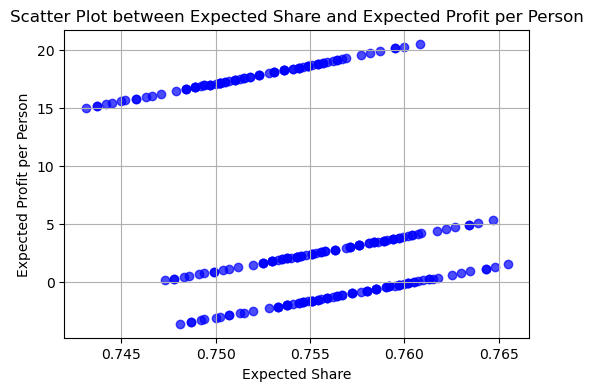

In [124]:
# Scatter plot
plt.figure(figsize=(6, 4))
plt.scatter(df['Expected Share'], df['Expected Profit per Person'], color='blue', alpha=0.7)
plt.title('Scatter Plot between Expected Share and Expected Profit per Person')
plt.xlabel('Expected Share')
plt.ylabel('Expected Profit per Person')
plt.grid(True)
plt.show()

In [106]:
# Find the index of the row with the maximum "Expected Share"
maxExpectedShareIndex = df['Expected Share'].idxmax()

In [107]:
# Retrieve the attributes of the row with the maximum "Expected Share"
maxExpectedShareAttributes = df.loc[maxExpectedShareIndex, ['Price', 'Time Insulated', 'Capacity', 'Cleanability', 'Containment', 'Cost', 'Expected Share','Margin','Expected Profit per Person']]

In [125]:
print("Product with highest market Share")
print(maxExpectedShareAttributes)

Product with highest market Share
Price                                        $5
Time Insulated                          0.5 hrs
Capacity                                  12 oz
Cleanability                  Difficult (7 min)
Containment                     Slosh resistant
Cost                                        3.0
Expected Share                           0.7655
Margin                                      2.0
Expected Profit per Person                 1.53
Name: 162, dtype: object


In [109]:
# Find the index of the row with the maximum "Margin"
maxMarginIndex = df['Margin'].idxmax()

In [110]:
# Retrieve the attributes of the row with the maximum "Margin"
maxMarginAttributes = df.loc[maxMarginIndex, ['Price', 'Time Insulated', 'Capacity', 'Cleanability', 'Containment', 'Cost', 'Expected Share','Margin','Expected Profit per Person']]

In [126]:
print("Product with maximum margin")
print(maxMarginAttributes)

Product with maximum margin
Price                                       $30
Time Insulated                          0.5 hrs
Capacity                                  12 oz
Cleanability                  Difficult (7 min)
Containment                     Slosh resistant
Cost                                        3.0
Expected Share                           0.7608
Margin                                     27.0
Expected Profit per Person                20.54
Name: 0, dtype: object


In [112]:
# Find the index of the row with the minmum "Cost"
minCostIndex = df['Cost'].idxmin()

In [113]:
# Retrieve the attributes of the row with the minimum "Cost"
minCostAttributes = df.loc[minCostIndex, ['Price', 'Time Insulated', 'Capacity', 'Cleanability', 'Containment', 'Cost', 'Expected Share','Margin','Expected Profit per Person']]

In [127]:
print("Product with minimum cost")
print(minCostAttributes)

Product with minimum cost
Price                                       $30
Time Insulated                          0.5 hrs
Capacity                                  12 oz
Cleanability                  Difficult (7 min)
Containment                     Slosh resistant
Cost                                        3.0
Expected Share                           0.7608
Margin                                     27.0
Expected Profit per Person                20.54
Name: 0, dtype: object


In [117]:
df['Revenue Per Person'] = df['Expected Share'] * df['priceNumeric']

In [118]:
df.head()

,Price,Time Insulated,Capacity,Cleanability,Containment,Expected Share,Cost,Margin,Expected Profit per Person,priceNumeric,Revenue Per Person
0,$30,0.5 hrs,12 oz,Difficult (7 min),Slosh resistant,0.7608,3.0,27.0,20.54,30,22.824
1,$30,0.5 hrs,12 oz,Difficult (7 min),Spill resistant,0.7600,3.3,26.7,20.29,30,22.800
2,$30,0.5 hrs,12 oz,Difficult (7 min),Leak resistant,0.7595,3.5,26.5,20.13,30,22.785
3,$30,0.5 hrs,12 oz,Clean Fair,Slosh resistant,0.7577,4.2,25.8,19.55,30,22.731
4,$30,0.5 hrs,12 oz,Clean Fair,Spill resistant,0.7569,4.5,25.5,19.30,30,22.707


In [119]:
# Find the index of the row with the maximum "Revenue Per Person"
maxRevenueIndex = df['Revenue Per Person'].idxmax()

In [120]:
print(maxRevenueIndex)

0


In [121]:
# Retrieve the attributes of the row with the minimum "Cost"
maxRevenueAttributes = df.loc[maxRevenueIndex, ['Price', 'Time Insulated', 'Capacity', 'Cleanability', 'Containment', 'Cost', 'Expected Share','Margin','Expected Profit per Person','Revenue Per Person']]

In [128]:
print("Product with maximum revenue")
print(maxRevenueAttributes)

Product with maximum revenue
Price                                       $30
Time Insulated                          0.5 hrs
Capacity                                  12 oz
Cleanability                  Difficult (7 min)
Containment                     Slosh resistant
Cost                                        3.0
Expected Share                           0.7608
Margin                                     27.0
Expected Profit per Person                20.54
Revenue Per Person                       22.824
Name: 0, dtype: object
